In [ ]:
import cv2 as cv
import cv2
import numpy as np
import imutils
import os
from pathlib import Path
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from imutils import contours
import operator

In [ ]:
fname = 'CleanShot 2021-04-14 at 12.53.05@2x.png'
fname = 'CleanShot 2021-04-14 at 17.08.46@2x.png'
fname = 'CleanShot 2021-04-14 at 17.16.37@2x.png'
fname = 'CleanShot 2021-04-14 at 19.43.12@2x.png'
# fname = "CleanShot 2021-03-28 at 21.34.47@2x.png"
# fname = 'screenshot.png'
url = Path(os.getenv("HOME"))/f"screenshots/{fname}"

In [ ]:
img = Image.open(url)# .resize((400, 400))
gray = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 100, 500, apertureSize=5)
dsize = 10
kernel = np.array([[0., dsize, 0.], [dsize, dsize, dsize], [0., dsize, 0.]], np.uint8)
proc = cv2.dilate(edges, kernel)

In [ ]:
contours, h = cv2.findContours(proc, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
polygon = contours[2]

In [ ]:
h

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [-1,  9, -1, -1]]], dtype=int32)

In [ ]:
[cv2.contourArea(_) for _ in contours]

[324995.0, 11187.0, 937.5, 633.5, 561.5, 422.0, 324.5, 127.5, 98.5, 76.0, 73.5]

In [ ]:
bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
top_left, _ =     min(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
bottom_left, _ =  min(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
top_right, _ =    max(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))

In [ ]:
i2 = img.copy()
draw = ImageDraw.Draw(i2)
x0 = list(polygon[top_left][0])
x1 = list(polygon[bottom_right][0])
draw.rectangle(x0+x1, width=5, outline='magenta')

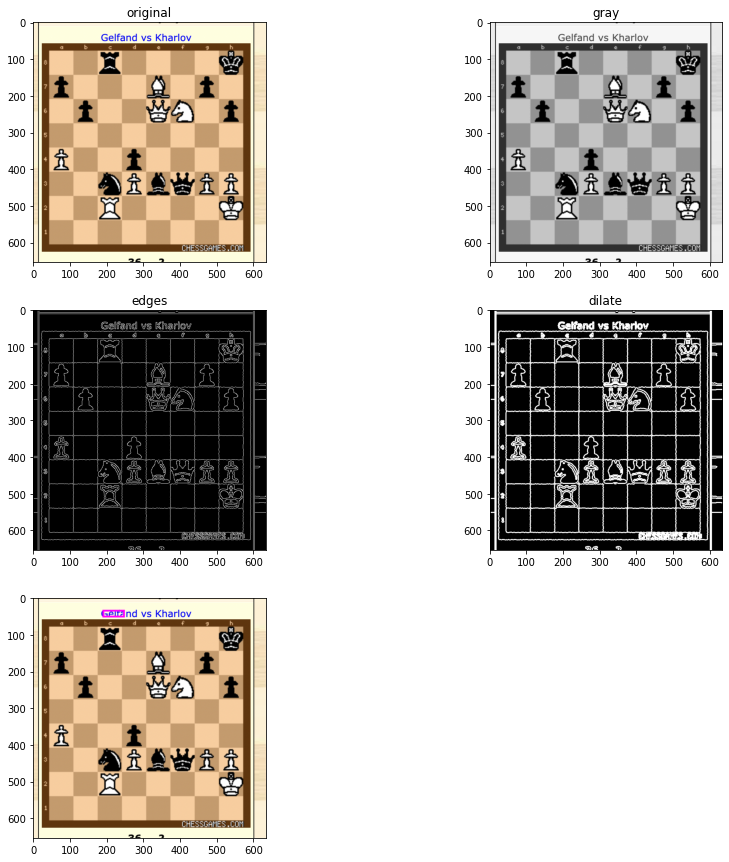

In [ ]:
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(3, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(img)
ax1.set_title("original")
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(gray, cmap='gray')
ax2.set_title("gray")
ax3 = fig.add_subplot(gs[1, 0])
ax3.imshow(edges, cmap='gray')
ax3.set_title("edges")
ax4 = fig.add_subplot(gs[1, 1])
ax4.imshow(proc, cmap='gray')
ax4.set_title("dilate")
ax5 = fig.add_subplot(gs[2, 0])
ax5.imshow(i2)